# Assignment 5
### Do all four questions.

**1.** Let's review some basic matrix multiplication. When you have an $M \times N$ matrix $A$ with $M$ rows and $N$ columns, 
$$
A= \left[ \begin{array}{cccc} a_{11} & a_{12} & ... & a_{1N} \\
a_{21} & a_{22} & ... & a_{2N} \\
\vdots & \vdots & ... & \vdots \\
a_{M1} & a_{M2} & ... & a_{MN} 
\end{array} \right],
$$
and you right-multiply it by a vector
$$
x = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N 
\end{array} \right],
$$
you get
$$
Ax = \left[ \begin{array}{c} \sum_{i=1}^N a_{1i} x_i \\ \sum_{i=1}^N a_{2i} x_i \\ \vdots \\ \sum_{i=1}^N a_{Mi} x_i 
\end{array} \right].
$$
This is just "matrix row times column vector" element-by-element, stacking the results into a new vector.

For this to make sense, $N$ must be the same for the matrix and the vector, but $M$ can be different from $N$. 

Let's play with some NumPy to see this. First we'll define a matrix $A$:

In [6]:
import numpy as np

A = np.array([ [1,2,3],
              [4,5,6],
              [7,8,9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

a. Multiply $A$ times each of the following vectors using the @ operator. Explain which part of the $A$ matrix gets selected and explain why, using the definition of matrix multiplication. 

In [2]:
e_1 = np.array([1,0,0])
e_2 = np.array([0,1,0])
e_3 = np.array([0,0,1])

In [ ]:
# Multiplying A with e_1. return the first column of A
# the first element is 1*1+2*0+3*0 = 1
# the second element is 4*1+5*0+6*0 = 4
# the third element is 7*1+8*0+9*0 = 7
# M
A@e_1

array([1, 4, 7])

In [ ]:
# Multiplying A with e_2 returns the second column of A
# the first element is 1*0+2*1+3*0 = 2
# the second element is 4*0+5*1+6*0 = 5
# the third element is 7*0+8*1+9*0 = 8
A@e_2

array([2, 5, 8])

In [ ]:
# Multiplying A with e_3 returns the third column of A
# the first element is 1*0+2*0+3*1 = 3
# the second element is 4*0+5*0+6*1 = 6
# the third element is 7*0+8*0+9*1 = 9
A@e_3

array([3, 6, 9])

b. Now multiply $A$ times $u = (1,1,1)$. Explain the logic of the result with the definition of matrix multiplication.

In [8]:
u = np.ones(3)

In [ ]:
# it returns the sum of each row of A
# the first element is 1*1+2*1+3*1 = 6
# the second element is 4*1+5*1+6*1 = 15
# the third element is 7*1+8*1+9*1 = 24
A@u

array([ 6., 15., 24.])

c. Whenever a matrix has 1's on the diagonal and zeros everywhere else, we call it an **identity matrix**. What happens when you multiple $A$ times $x$ below? What happens when you multiple an identity matrix times any vector? Explain your result with the definition of matrix multiplication.

In [10]:
A = np.array([ [1,0,0],
              [0,1,0],
              [0,0,1]])
x = np.array([-2,4,11])


In [ ]:
# the result returns the vector x
# first element 1*(-2)+0*4+0*11 = -2
# second element 0*(-2)+1*4+0*11 = 4
# third element 0*(-2)+0*4+1*11 = 11
A@x

array([-2,  4, 11])

d. What if every row and column sum to 1, but the 1's are no longer on the diagonal? Multiple $A$ times $X$ below and explain the result. Create another matrix whose rows and columns sum to 1, but is not an identity matrix, and show how it permutes the values of $x$. 

In [ ]:
A = np.array([ [0,0,1],
              [1,0,0],
              [0,1,0]])
x = np.array([-2,4,11])

In [ ]:
# it returns the vestor x in a new order: 11,-2,4
# first element 0*(-2)+0*4+1*11 = 11
# second element 1*(-2)+0*4+0*11 = -2
# third element 0*(-2)+1*4+0*11 = 4
A@x

array([11, -2,  4])

e. The next matrix $A$ could be a Markov transition matrix: Its columns sum to 1, and each entry $a_{ij}$ can be interpreted as the proportion of observations who moved from state $j$ to state $i$. Multiply $A$ by each of the vectors $e_1$, $e_2$, and $e_3$, and explain your results.

In [14]:
rng = np.random.default_rng(100)
A = rng.random((3,3)) # Generate a random 3X3 matrix
sums = np.sum(A,axis=0) # Column sums
A = A/sums # Normalize the columns so they sum to 1
print(A)

[[0.50052958 0.24049286 0.18358131]
 [0.02574731 0.39251588 0.37907577]
 [0.47372311 0.36699127 0.43734292]]


f. For each of the vectors $e_1, e_2, e_3$, multiple $A$ times that vector 5 times. What answer do you get for each starting vector? Describe the behavior you observe.

In [50]:
# getting 5 multiplication for e_1
v1=A@e_1
v1

array([0.50052958, 0.02574731, 0.47372311])

In [51]:
v2 = A@v1
v2

array([0.34368862, 0.20257047, 0.45374091])

In [52]:
v3 = A@v2
v3

array([0.30404142, 0.26036337, 0.43559521])

In [53]:
v4 = A@v3
v4

array([0.29476439, 0.27514859, 0.43008701])

In [54]:
# Result for e_1 after 5 multimplication
v5 = A@v4
v5

array([0.29266551, 0.27862515, 0.42870935])

In [55]:
# getting 5 multiplications for e_2
b1=A@e_2
b1

array([0.24049286, 0.39251588, 0.36699127])

In [56]:
b2=A@b1
b2

array([0.28214379, 0.29937825, 0.41847795])

In [57]:
b3=A@b2
b3

array([0.29004438, 0.28341002, 0.42654561])

In [58]:
b4=A@b3
b4

array([0.29163968, 0.2804039 , 0.42795643])

In [59]:
# Result for e_2 after 5 multimplication
b5=A@b4
b5

array([0.29197422, 0.27979983, 0.42822595])

In [60]:
# multiplication of e_3
c1 = A@e_3
c1

array([0.18358131, 0.37907577, 0.43734292])

In [61]:
c2 = A@c1
c2

array([0.26334088, 0.31930609, 0.41735304])

In [62]:
c3 = A@c2
c3

array([0.28521895, 0.29032145, 0.4244596 ])

In [63]:
c4 = A@c3
c4

array([0.29050361, 0.28220175, 0.42729464])

In [64]:
# Result for e_3 after 5 multimplication
c5 = A@c4
c5

array([0.29171646, 0.2802254 , 0.42805814])

In [ ]:
# Conclusion, the results for e_1, e_2. e_3 after 5 multiplications are similar to each other

*2.* Let's consider a simple Markov transition matrix over two states:
$$
T = \left[ \begin{array}{cc} p_{1\leftarrow 1} &  p_{1\leftarrow 2} \\
p_{2 \leftarrow 1} & p_{2 \leftarrow 2} \end{array}\right] 
$$
The arrows help visualize the transition a bit: This is the same index notation as usual, $p_{ij}$, but writing it $p_{i \leftarrow j}$ emphasizes that it's the proportion of times that state $j$ transitions to state $i$. Below, $T$ is given by
$$
T = \left[ \begin{array}{cc} .25 & .5 \\
.75 & .5 \end{array}\right].
$$

- Start in state 1, at the initial condition $[1,0]$. Multiply that vector by $T$. Write out the result in terms of the formula and compute the result in a code chunk below. What is this object you're looking at, in terms of proportions and transitions?
- Multiple by $T$ again. What do you get? This isn't a column of $T$. Explain in words what it is. (Hint: A forecast of what in what period?)
- Keep multiplying the current vector of outcomes by $T$. When does it start to settle down without changing further?
- Do the above analysis again, starting from the initial condition $[0,1]$. Do you get a different result?
- The take-away is that, in the long run, these chains settle down into the long-run proportions, and the sensitivity on initial conditions vanishes. 


In [39]:
T = np.array([[ 1/4, 1/2],
                 [ 3/4, 1/2 ]])

In [48]:
# start in state 1
x = np.array([1,0])
T@x
# I'm looking at the distribution of staes after one step: 25% change in state 1 and 75% in state 2

array([0.25, 0.75])

In [66]:
# multiply T agian - State 2
t2 = T@(T@x)
t2
# this is a forecast of the state distribution after two time periods

array([0.4375, 0.5625])

In [ ]:
# keep multipling T
t3=T@t2
t3

array([0.390625, 0.609375])

In [ ]:
t4 = T@t3
t4
# at around forth multiplication it settles down to (0.4,0.6)

array([0.40234375, 0.59765625])

In [70]:
# do this agian for [0,1]
x = np.array([0,1])
T@x

array([0.5, 0.5])

In [71]:
t2 = T@(T@x)
t2

array([0.375, 0.625])

In [73]:
t3 = T@t2
t3

array([0.40625, 0.59375])

In [ ]:
t4 = T@t3
t4
# I got the same result (0.4,0.6)

array([0.3984375, 0.6015625])

3. Weather data

- Load the `cville_weather.csv` data. This includes data from Jan 4, 2024 to Feb 2, 2025. Are there any missing data issues?
- Based on the precipitation variable, `PRCP`, make a new variable called `rain` that takes the value 1 if `PRCP`>0 and 0 otherwise.
- Build a two-state Markov chain over the states 0 and 1 for the `rain` variable. 
- For your chain from c, how likely is it to rain if it was rainy yesterday? How likely is it to rain if it was clear yesterday?
- Starting from a clear day, forecast the distribution. How quickly does it converge to a fixed result? What if you start from a rainy day?
- Conditional on being rainy, plot a KDE of the `PRCP` variable.
- Describe one way of making your model better for forecasting and simulation the weather.

Congratulations, you now are a non-parametric meteorologist!

In [ ]:
# load in data
import pandas as pd

df = pd.read_csv('data/cville_weather.csv')
df
# yes, there are missing data issues in many columns

,STATION,NAME,DATE,DAPR,DAPR_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES
0,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-04,NaN,NaN,NaN,NaN,0.03,",,N",NaN,NaN,NaN,NaN
1,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-07,NaN,NaN,NaN,NaN,1.08,",,N",NaN,NaN,NaN,NaN
2,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-09,NaN,NaN,NaN,NaN,0.24,",,N",NaN,NaN,NaN,NaN
3,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-10,NaN,NaN,NaN,NaN,3.00,",,N",NaN,NaN,NaN,NaN
4,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-24,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,US1VAAB0010,"CHARLOTTESVILLE 8.4 W, VA US",2025-01-27,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN
407,US1VAAB0010,"CHARLOTTESVILLE 8.4 W, VA US",2025-01-28,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN
408,US1VAAB0010,"CHARLOTTESVILLE 8.4 W, VA US",2025-01-29,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN
409,US1VAAB0010,"CHARLOTTESVILLE 8.4 W, VA US",2025-01-30,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN


In [8]:
# create new variable 'rain' based on 'PRCP'
df['rain']= np.where(df['PRCP']>0, 1, 0)
df[['PRCP', 'rain']]

,PRCP,rain
0,0.03,1
1,1.08,1
2,0.24,1
3,3.00,1
4,0.00,0
...,...,...
406,0.00,0
407,0.00,0
408,0.00,0
409,0.00,0


In [10]:
# Building a two-state Markov chain over states 0 and 1 for rain variable
# setup previous day column
df['prev_day'] = df['rain'].shift(1)
df[['prev_day','rain']]

,prev_day,rain
0,NaN,1
1,1.0,1
2,1.0,1
3,1.0,1
4,1.0,0
...,...,...
406,0.0,0
407,0.0,0
408,0.0,0
409,0.0,0


In [11]:
# count transitions
counts = pd.crosstab(df['rain'], df['prev_day'])
counts

prev_day,0.0,1.0
rain,,
0,169,63
1,62,116


In [ ]:
# normalizing column
T = counts / counts.sum(axis=0)
T
# if it was raining yesterday, 64.8% chance it will rain today
# if it was clear yeasterday, 26.8% chance it will rain today

prev_day,0.0,1.0
rain,,
0,0.731602,0.351955
1,0.268398,0.648045


In [18]:
# start with a clear day, forecast the distribution
x = [1,0]
v1=T@x
v1

rain
0    0.731602
1    0.268398
dtype: float64

In [19]:
v2 = T@v1
v2

rain
0    0.629705
1    0.370295
dtype: float64

In [ ]:
v3 = T@v2
v3
# after the 2nd time period, it start to converg to (0.6,0.4)

rain
0    0.591021
1    0.408979
dtype: float64

In [22]:
# start with a rainy day
x =[0,1]
v1=T@x
v1

rain
0    0.351955
1    0.648045
dtype: float64

In [23]:
v2 = T@v1
v2

rain
0    0.485574
1    0.514426
dtype: float64

In [ ]:
v3 = T@v2
v3
# the result is slightly different after the 2nd time period, it starts to emerge to (0.5,0.5)

rain
0    0.536302
1    0.463698
dtype: float64

In [25]:
# Conditional on being rainy, plot a KDE of the `PRCP` variable.
rainy_days = df[df['rain']==1]['PRCP']
rainy_days

0      0.03
1      1.08
2      0.24
3      3.00
5      0.18
       ... 
378    0.04
390    0.02
395    0.36
400    1.10
401    0.13
Name: PRCP, Length: 179, dtype: float64

<Axes: ylabel='Density'>

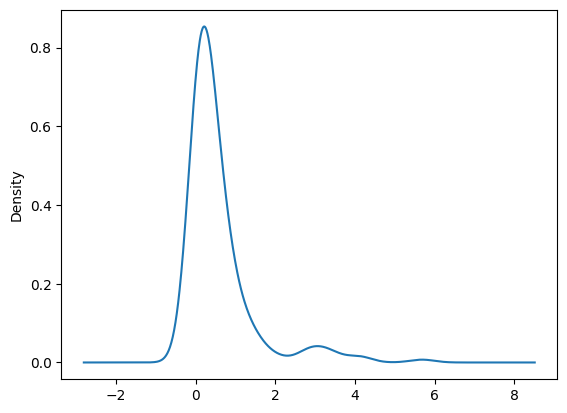

In [26]:
rainy_days.plot(kind='kde')

4. Taxicab trajectories: Using the pickled taxicab data, we want to complete the exercise from class.

- For the taxicab trajectory data, determine your state space and clean your sequences of cab rides.
- Compute the transition matrix for the taxicab data between neighborhoods in Manhattan. Plot it in a heat map. What are the most common routes?
- Explain why taxicabs are most likely order 1, and not 2 or more.
- Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips
- Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?